In [35]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 20,8
from datetime import datetime

In [30]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col = 'Month', date_parser = dateparse)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


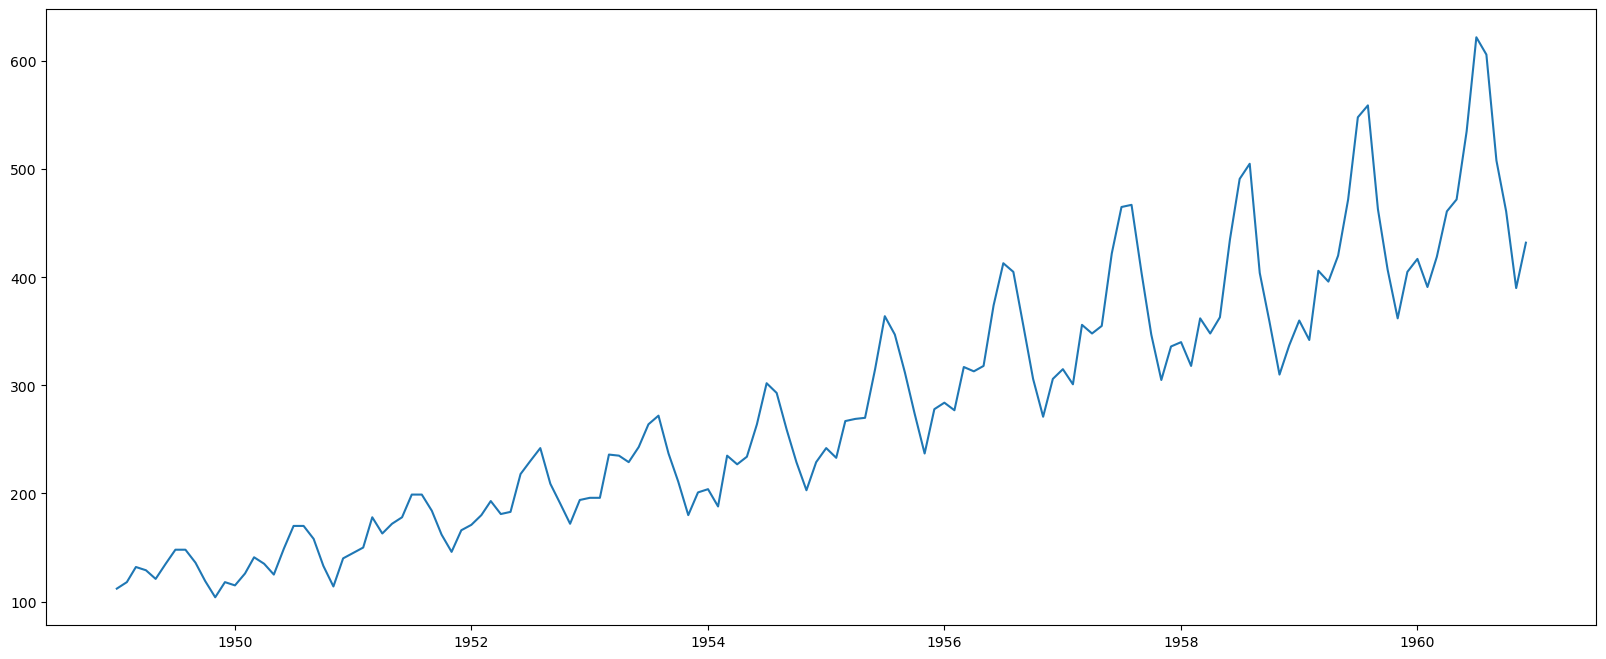

In [31]:
plt.plot(df)
plt.show()

In [41]:
# Inicialização das variáveis para armazenar a melhor configuração e o melhor MSE
optimal_n = None  # Valor ótimo de n (número de passos anteriores)
best_mse = None   # Melhor valor de MSE (Erro Quadrático Médio)

# Convertendo a coluna '#Passengers' do DataFrame para um array de float32
db = df[['#Passengers']].values.astype('float32')

# Inicialização de um array para armazenar os resultados médios de MSE
# para todas as possíveis configurações de n
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))

# Loop através de várias configurações de n para calcular os MSEs
for n in range(3, int(len(db) / 2 + 1)):
    # Inicialização de um array para armazenar os valores de MSE para a configuração atual de n
    mean_for_n = np.zeros(len(db) - n)
    
    # Loop através dos dados para calcular os valores de MSE
    for i in range(0, len(db) - n):
        # Cálculo do MSE para a configuração atual de n e posição i
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i+n][0], 2)
    
    # Armazenamento da média dos MSEs calculados para a configuração atual de n
    mean_results_for_all_possible_n_values[n-3] = np.mean(mean_for_n)

# Encontrando o valor ótimo de n com base no índice do menor valor de MSE
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3

# Encontrando o menor valor de MSE
best_mse = np.min(mean_results_for_all_possible_n_values)

# Impressão dos resultados
print('MSE =', mean_results_for_all_possible_n_values)
print('Melhor MSE =', best_mse)
print('Ótimo n =', optimal_n)

MSE = [ 2339.63356126  2764.88660714  3012.10128709  3151.45469085
  3227.18632274  3256.56100643  3186.6614532   3011.60186946
  2743.00652782  2472.34091928  2354.71361401  2403.15665424
  2555.64628844  2755.90582275  2957.73325883  3148.95678109
  3318.74202065  3471.20655414  3579.85735927  3632.1383133
  3621.28446048  3590.00382793  3614.46072399  3714.23057056
  3856.30383806  4039.07639445  4228.22951927  4417.98332931
  4590.62775569  4759.11651611  4915.97544876  5048.63704665
  5147.82094512  5226.01903743  5334.33177783  5486.37155691
  5665.83581156  5879.92290769  6108.05805477  6311.94563847
  6507.04778972  6685.18398409  6897.90877682  7105.06745207
  7299.11089319  7470.66004841  7664.68188379  7894.86749032
  8104.34268864  8337.10501668  8595.05628641  8844.55092457
  9063.90415815  9272.33339998  9544.40100932  9837.04023888
 10135.60331142 10420.20548681 10725.07181564 11069.94461765
 11393.32528446 11748.71711731 12111.18046458 12433.46474122
 12664.11747454 129

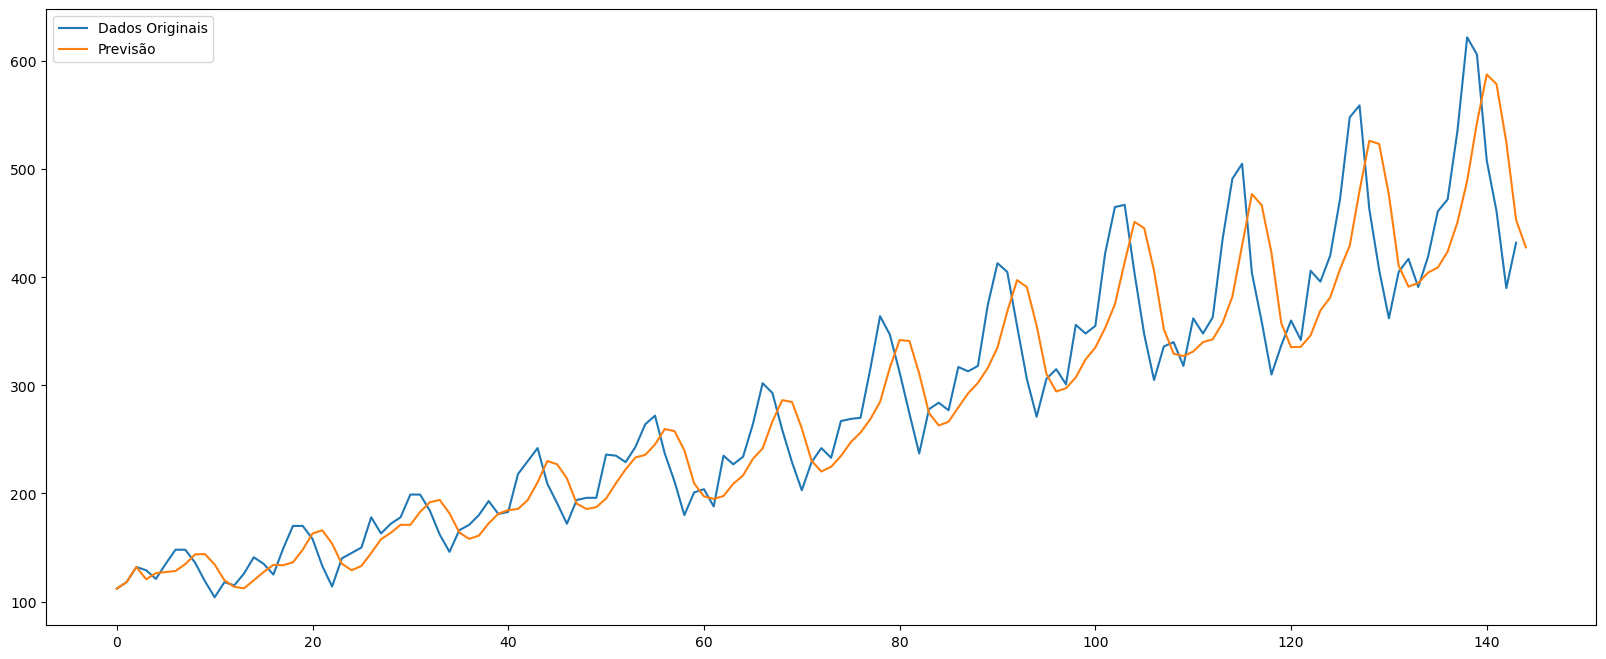

In [50]:
# Inicialização e preenchimento das previsões
forecast = np.concatenate((db[:optimal_n, 0], np.convolve(db[:, 0], np.ones(optimal_n)/optimal_n, mode='valid')), axis=None)

# Plotando os dados originais e as previsões
plt.plot(db[:,0], label='Dados Originais') # Gráfico dos dados originais
plt.plot(forecast, label='Previsão') # Gráfico das previsões
plt.legend() # Adiciona a legenda
plt.show() # Exibe o gráfico